<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Tinnitus_Dynamic_ML_Tunning_with_featSelect_SHAP_ROC_Cross_val_version_931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR&EEG_2022.08.18_final.csv")
 
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR&EEG_2022.08.26_final.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [377]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'06_HSO_60_01',Control,Test,96,177,213,304,425,135,175,...,4.670000e-07,0.000055,0.0949,0.0372,0.387,0.481,1.240,6.57,0.245,2.55
1,'06_LSR_34_01',Control,Test,108,151,219,282,390,126,152,...,5.330000e-07,0.000047,0.1210,0.0500,0.419,0.410,0.979,4.83,0.290,2.43
2,'07_KHJ_33_02',Control,Test,123,195,246,275,456,99,166,...,2.890000e-05,0.000778,0.0805,0.0527,0.301,0.566,1.880,6.51,0.268,1.53
3,'08_LJS_26_01',Control,Test,98,163,212,320,416,134,197,...,5.990000e-07,0.000075,0.0885,0.0397,0.354,0.518,1.460,6.80,0.250,2.23
4,'09_JBH_58_01',Control,Test,127,166,206,271,386,119,153,...,8.390000e-07,0.000074,0.1090,0.0564,0.392,0.442,1.130,5.04,0.278,1.93


In [378]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Patient'}

In [379]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [380]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

#Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [381]:
'''
list_of_feat=[]
norm_start=int(input("Normal Features Start Index:"))
norm_end=int(input("Normal Features End Index:"))
eeg_start=int(input("EEG Features Start Index:"))
eeg_end=int(input("EEG Features End Index:"))



list_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
'''

'\nlist_of_feat=[]\nnorm_start=int(input("Normal Features Start Index:"))\nnorm_end=int(input("Normal Features End Index:"))\neeg_start=int(input("EEG Features Start Index:"))\neeg_end=int(input("EEG Features End Index:"))\n\n\n\nlist_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])\n'

#Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [382]:
'''list_of_feat=[]
num=int(input("Input number of features: "))

for i in range(num):
  print(i+1,".")
  list_of_feat.append(input("Feature Name: "))'''


'list_of_feat=[]\nnum=int(input("Input number of features: "))\n\nfor i in range(num):\n  print(i+1,".")\n  list_of_feat.append(input("Feature Name: "))'

#Feature Selection (Model Free)

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [383]:
'''from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']'''


"from sklearn.feature_selection import SelectKBest\nbestfeatures_1 = SelectKBest(k=10)\nfit = bestfeatures_1.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']"

**Type-2**

In [384]:
'''
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectKBest,f_classif\nbestfeatures_2=SelectKBest(f_classif, k=10)\nfit = bestfeatures_f2fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

**Type-3**

In [385]:
'''
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectFpr, f_classif\n\nbestfeatures_3=SelectFpr(f_classif, alpha=0.1)\nfit = bestfeatures_3.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

<font color='blue' size=6><b>Input</b></font>

In [386]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [387]:
'''imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)'''

"imp=featureScores.nlargest(number_of_feat,'Score')\nprint(imp)"

In [388]:
'''
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])
  '''

'\nlist_of_feat=[]\n\nfor i in range(number_of_feat):\n  list_of_feat.append(imp.iloc[:,0:1].values[i][0])\n  '

#Feature Selection (Model Based)

<font color='blue' size=6><b>Input</b></font>

In [389]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [390]:
'''from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X_, y_)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'''

'from sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=3)\nsfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)\nsfs.fit(X_, y_)\nlist_of_feat=[]\nlist_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [391]:
list_of_feat=["Subjects",
              "p3_gap_peak_amp_20ms",
    "p3_gap_peak_amp_50ms",
    "p1_gap_peak_amp_20ms",
    "p1_gap_peak_amp_50ms",
    "gap_AUC_n1p2_R_20ms",
    "gap_AUC_n1p2_R_50ms",
    "n1p3_interval_nogap_20ms",
    "n1p3_interval_nogap_50ms",
    "n2_gap_peak_amp_20ms",
    "n2_gap_peak_amp_50ms",
    "p2n2_gap_nogap_diff_20ms",
    "p2n2_gap_nogap_diff_50ms",
    "gap_AUC_n1p2_L_20ms",
    "gap_AUC_n1p2_L_50ms",
    "gap_AUC_p1n1_R_20ms",
    "gap_AUC_p1n1_R_50ms",
    "gap_AUC_n1p2n2_20ms",
    "gap_AUC_n1p2n2_50ms",
    "n2_nogap_peak_ms_20ms",
    "n2_nogap_peak_ms_50ms",
    "n1p2_gap_no_gap_ratio_20ms",
    "n1p2_gap_no_gap_ratio_50ms",
    "PeakF_Theta_20ms",
    "PeakF_Theta_50ms",
    "SpectralEdge_Delta_20ms",
    "SpectralEdge_Delta_50ms",
    "RelativeAlpha_20ms",
    "RelativeAlpha_50ms",
    "DTABR_20ms",
    "DTABR_50ms"]

print(len(list_of_feat))

31


In [392]:
print(list_of_feat)

['Subjects', 'p3_gap_peak_amp_20ms', 'p3_gap_peak_amp_50ms', 'p1_gap_peak_amp_20ms', 'p1_gap_peak_amp_50ms', 'gap_AUC_n1p2_R_20ms', 'gap_AUC_n1p2_R_50ms', 'n1p3_interval_nogap_20ms', 'n1p3_interval_nogap_50ms', 'n2_gap_peak_amp_20ms', 'n2_gap_peak_amp_50ms', 'p2n2_gap_nogap_diff_20ms', 'p2n2_gap_nogap_diff_50ms', 'gap_AUC_n1p2_L_20ms', 'gap_AUC_n1p2_L_50ms', 'gap_AUC_p1n1_R_20ms', 'gap_AUC_p1n1_R_50ms', 'gap_AUC_n1p2n2_20ms', 'gap_AUC_n1p2n2_50ms', 'n2_nogap_peak_ms_20ms', 'n2_nogap_peak_ms_50ms', 'n1p2_gap_no_gap_ratio_20ms', 'n1p2_gap_no_gap_ratio_50ms', 'PeakF_Theta_20ms', 'PeakF_Theta_50ms', 'SpectralEdge_Delta_20ms', 'SpectralEdge_Delta_50ms', 'RelativeAlpha_20ms', 'RelativeAlpha_50ms', 'DTABR_20ms', 'DTABR_50ms']


In [393]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [394]:
X_new.shape

(165, 31)

In [395]:
y_new.shape

(165,)

In [396]:
'''from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'''

'from sklearn.model_selection import train_test_split\nX_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'

In [397]:
X_train_with_subject=X_new.iloc[:108,:]  
X_test_with_subject=X_new.iloc[108:,:]
y_train=y_new.iloc[:108]
y_test=y_new.iloc[108:]

In [398]:
X_train_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n1p2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
0,'06_HSO_60_01',10.092901,10.988888,10.379415,8.422405,0.108394,0.229010,6.555694,4.761199,11.544318,...,-601.061131,-526.598962,3.891052,3.891052,4.280156,4.280156,0.0887,0.0949,6.64,6.57
1,'06_LSR_34_01',17.845904,11.594803,16.052158,9.174875,0.147754,0.185048,11.405960,5.217714,17.548932,...,-737.699525,-507.540090,3.891052,3.891052,4.280156,4.280156,0.0864,0.1210,7.06,4.83
2,'07_KHJ_33_02',5.955162,6.788743,3.959968,5.523335,0.264380,0.073321,5.046243,4.065167,6.958529,...,-286.287981,-520.355648,4.280156,5.058368,4.669262,4.669262,0.0783,0.0805,6.57,6.51
3,'08_LJS_26_01',5.638387,7.702433,3.270295,7.462832,0.183007,0.226157,2.104986,3.049172,2.438374,...,-72.540051,-158.422926,3.891052,3.501946,3.891050,4.280156,0.1110,0.0885,5.16,6.80
4,'09_JBH_58_01',13.384259,11.459661,10.114451,12.183127,0.123296,0.118154,8.523228,7.317047,11.947191,...,-432.078750,-227.072483,4.280156,3.891052,3.891050,4.280156,0.1230,0.1090,4.35,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,'37_JTH_54_01_8k',6.233526,6.487803,4.007776,4.681958,0.130233,0.214191,4.614487,3.456188,5.905573,...,-242.763418,-252.384700,3.501946,5.058368,5.058368,4.280156,0.1830,0.1480,2.34,2.85
104,'38_KSP_55_01_8k',7.242361,9.821408,2.857598,4.063369,0.557335,0.526057,5.601528,6.814410,8.033632,...,-359.196223,-327.087214,4.669262,4.669262,5.058368,4.669262,0.1480,0.1630,3.62,2.33
105,'39_PYH_68_01_4k',9.044319,8.014453,2.595737,2.521545,0.353462,0.475860,4.941975,6.062910,6.310380,...,-146.641295,-301.179802,21.400778,4.669262,5.058368,4.669262,0.2820,0.1630,1.41,2.33
106,'41_HKS_65_01_8k',3.738782,7.349214,4.770803,4.101451,0.197828,0.197740,4.131827,3.889128,5.224312,...,-378.315377,-223.812815,3.501946,4.280156,4.280156,4.669260,0.1520,0.1520,2.29,2.01


In [399]:
X_test_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n1p2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
108,'44_KMR_59_01_4k',3.517800,7.405892,5.256828,5.927552,0.171486,0.166694,2.874991,3.752467,5.238722,...,-200.967429,-322.458057,3.501946,3.501946,3.891050,3.891050,0.1030,0.0939,5.210,5.38
109,'45_JGB_58_01_8k',6.139246,5.880981,3.988710,1.977989,0.324000,0.448445,3.616313,2.394475,5.786083,...,-398.492940,-409.324271,3.891050,5.836576,3.891050,5.058368,0.0795,0.1700,7.810,1.24
110,'46_HCN_59_01_8k',6.126890,4.604948,5.066167,3.556672,0.198397,0.461876,4.138920,0.867977,6.487275,...,-390.005893,-323.758429,3.891050,4.669262,3.891050,5.058368,0.0703,0.1320,9.010,3.73
111,'47_KCH_60_01_8k',6.487341,7.726059,7.272150,8.521933,0.229514,0.211368,1.357009,2.960328,4.731753,...,-324.474992,-373.196463,5.836578,3.891050,5.058366,4.280156,0.1720,0.1570,0.674,0.85
112,'48_KYH_52_01_8k',14.904677,9.868674,8.343045,6.203548,0.171885,0.288525,9.322207,5.159080,11.936167,...,-542.424310,-425.519274,4.669262,4.669262,4.669262,4.669262,0.0982,0.1200,4.910,4.13
113,'50_PSD_53_01_8k',6.954890,3.277235,5.547944,3.847664,0.178827,0.202618,3.582816,1.449893,6.485732,...,-315.868989,-199.101191,4.669262,4.280158,4.280156,5.058368,0.1130,0.1070,3.530,4.86
114,'52_KHM_47_01_4k',5.175671,8.228541,6.118266,4.164325,0.174171,0.246547,1.557910,5.250515,4.302344,...,-340.285459,-412.261173,6.614788,5.058366,5.447474,4.669262,0.2100,0.1050,1.000,3.39
115,'53_JWJ_20_01_8k',4.138365,5.831637,1.745767,1.717376,0.314998,0.395114,0.707366,4.196634,4.775794,...,-238.190006,-287.466240,3.891050,4.280156,4.280156,4.669262,0.0970,0.1110,5.560,4.62
116,'54_LJB_26_01_8k',6.818168,6.948500,4.461776,5.049820,0.103086,0.225523,3.144253,3.751045,6.212740,...,-314.435521,-380.100403,5.447474,5.058368,5.447474,5.447474,0.1760,0.1770,1.710,1.41
117,'56_LJN_55_01_8k',8.574069,8.542279,7.066368,5.928560,0.102989,0.154894,5.035923,4.675899,11.255916,...,-440.900077,-226.836270,3.891050,4.280156,3.891050,4.280156,0.0943,0.0764,6.170,6.24


In [400]:
X_train = X_train_with_subject.iloc[:,1:]
X_test  = X_test_with_subject.iloc[:,1:]

In [401]:
result={}



---





---



#ADABOOST

In [402]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[13  6]
 [18 20]]
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        19
           1       0.77      0.53      0.62        38

    accuracy                           0.58        57
   macro avg       0.59      0.61      0.57        57
weighted avg       0.65      0.58      0.59        57

Accurecy:  0.5789473684210527


1/200 round completed......................... Accurecy: 0.5964912280701754
2/200 round completed......................... Accurecy: 0.5087719298245614
3/200 round completed......................... Accurecy: 0.631578947368421
4/200 round completed......................... Accurecy: 0.631578947368421
5/200 round completed......................... Accurecy: 0.6140350877192983
6/200 round completed......................... Accurecy: 0.6666666666666666
7/200 round completed......................... Accurecy: 0.6666666666666666
8/200 round completed......................... Accurecy: 0.6842105263157895
9/200 round completed......................... Accurecy: 0.6666666666666666
10/200 round completed......................... Accurecy: 0.6140350877192983
11/200 round completed......................... Accurecy: 0.631578947368421
12/200 round completed......................... Accurecy: 0.5964912280701754
13/200 round completed......................... Accurecy: 0.6140350877192983
14/200 roun

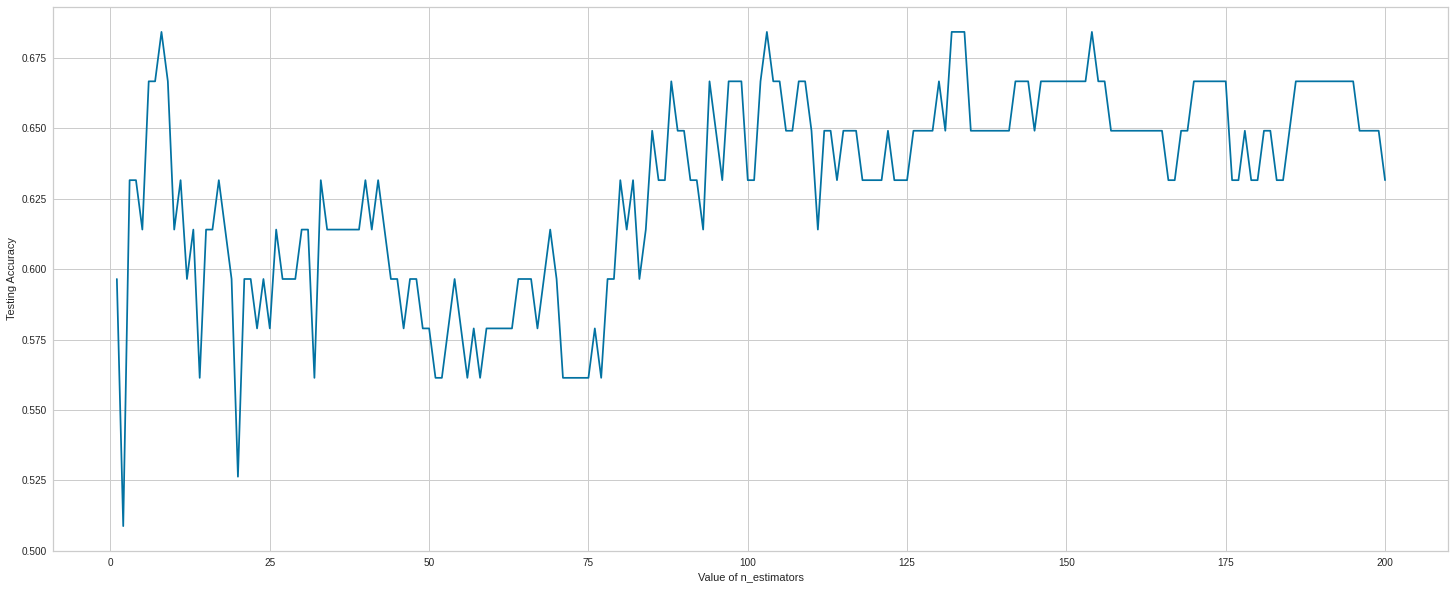

In [403]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [404]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [11 27]]
              precision    recall  f1-score   support

           0       0.52      0.63      0.57        19
           1       0.79      0.71      0.75        38

    accuracy                           0.68        57
   macro avg       0.66      0.67      0.66        57
weighted avg       0.70      0.68      0.69        57

Accurecy:  0.6842105263157895




---



---



#Graddient Boosting

In [405]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [14 24]]
              precision    recall  f1-score   support

           0       0.48      0.68      0.57        19
           1       0.80      0.63      0.71        38

    accuracy                           0.65        57
   macro avg       0.64      0.66      0.64        57
weighted avg       0.69      0.65      0.66        57

Accurecy:  0.6491228070175439


1/150 round completed......................... Accurecy: 0.3333333333333333
2/150 round completed......................... Accurecy: 0.3333333333333333
3/150 round completed......................... Accurecy: 0.5789473684210527
4/150 round completed......................... Accurecy: 0.5789473684210527
5/150 round completed......................... Accurecy: 0.5964912280701754
6/150 round completed......................... Accurecy: 0.631578947368421
7/150 round completed......................... Accurecy: 0.5964912280701754
8/150 round completed......................... Accurecy: 0.631578947368421
9/150 round completed......................... Accurecy: 0.6491228070175439
10/150 round completed......................... Accurecy: 0.6491228070175439
11/150 round completed......................... Accurecy: 0.6491228070175439
12/150 round completed......................... Accurecy: 0.6491228070175439
13/150 round completed......................... Accurecy: 0.6491228070175439
14/150 rou

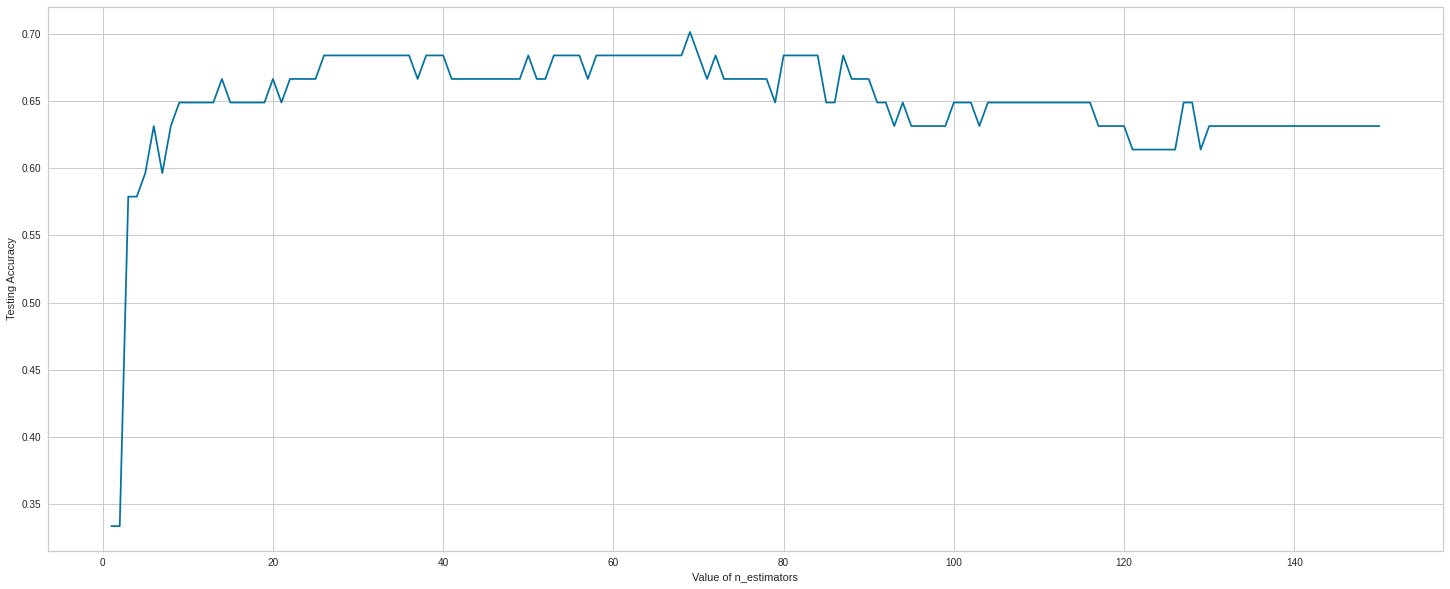

In [406]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7368421052631579
2/30 round completed......................... Accurecy: 0.631578947368421
3/30 round completed......................... Accurecy: 0.6491228070175439
4/30 round completed......................... Accurecy: 0.6140350877192983
5/30 round completed......................... Accurecy: 0.5614035087719298
6/30 round completed......................... Accurecy: 0.5263157894736842
7/30 round completed......................... Accurecy: 0.6140350877192983
8/30 round completed......................... Accurecy: 0.631578947368421
9/30 round completed......................... Accurecy: 0.631578947368421
10/30 round completed......................... Accurecy: 0.631578947368421
11/30 round completed......................... Accurecy: 0.631578947368421
12/30 round completed......................... Accurecy: 0.631578947368421
13/30 round completed......................... Accurecy: 0.631578947368421
14/30 round completed.......

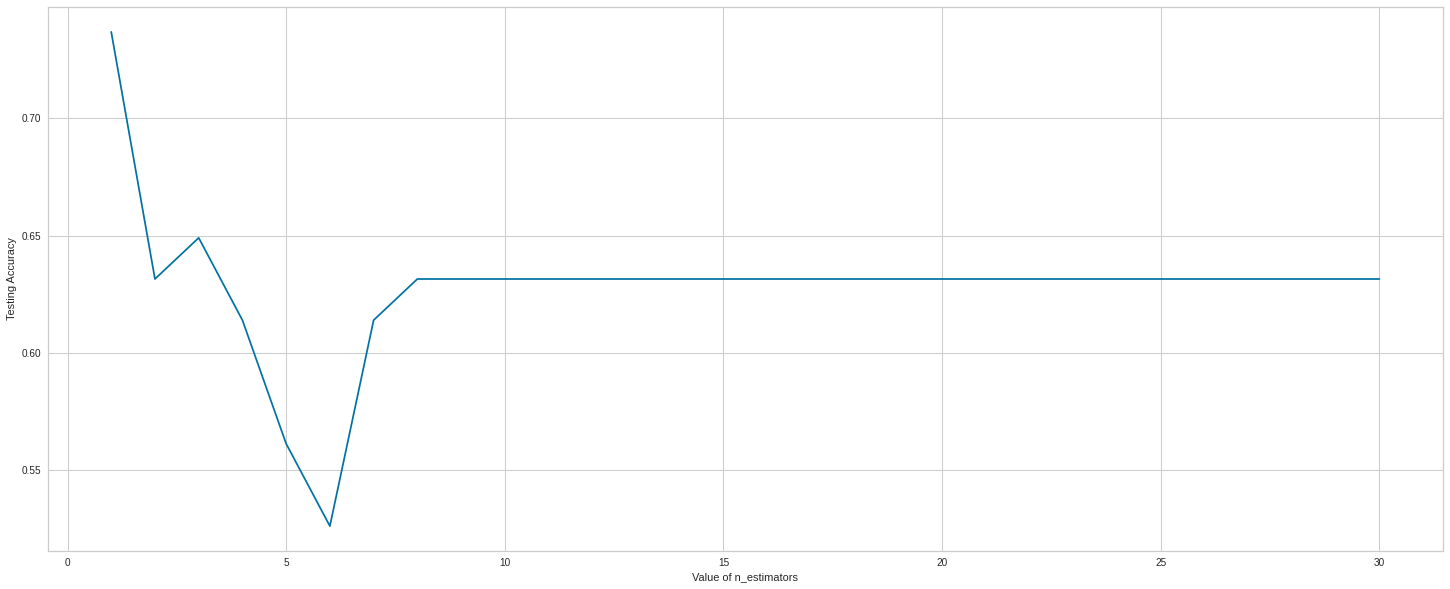

In [407]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [408]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [13 25]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        19
           1       0.86      0.66      0.75        38

    accuracy                           0.70        57
   macro avg       0.70      0.72      0.69        57
weighted avg       0.75      0.70      0.71        57

Accurecy:  0.7017543859649122


In [409]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[17  2]
 [13 25]]
              precision    recall  f1-score   support

           0       0.57      0.89      0.69        19
           1       0.93      0.66      0.77        38

    accuracy                           0.74        57
   macro avg       0.75      0.78      0.73        57
weighted avg       0.81      0.74      0.74        57

Accurecy:  0.7368421052631579


In [410]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[16  3]
 [16 22]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.63        19
           1       0.88      0.58      0.70        38

    accuracy                           0.67        57
   macro avg       0.69      0.71      0.66        57
weighted avg       0.75      0.67      0.67        57

Accurecy:  0.6666666666666666




---



---



#Random Forest

In [411]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14  5]
 [18 20]]
              precision    recall  f1-score   support

           0       0.44      0.74      0.55        19
           1       0.80      0.53      0.63        38

    accuracy                           0.60        57
   macro avg       0.62      0.63      0.59        57
weighted avg       0.68      0.60      0.61        57

Accurecy:  0.5964912280701754


1/150 round completed......................... Accurecy: 0.5964912280701754
2/150 round completed......................... Accurecy: 0.5964912280701754
3/150 round completed......................... Accurecy: 0.6666666666666666
4/150 round completed......................... Accurecy: 0.5964912280701754
5/150 round completed......................... Accurecy: 0.6666666666666666
6/150 round completed......................... Accurecy: 0.6491228070175439
7/150 round completed......................... Accurecy: 0.6491228070175439
8/150 round completed......................... Accurecy: 0.5964912280701754
9/150 round completed......................... Accurecy: 0.6140350877192983
10/150 round completed......................... Accurecy: 0.631578947368421
11/150 round completed......................... Accurecy: 0.631578947368421
12/150 round completed......................... Accurecy: 0.631578947368421
13/150 round completed......................... Accurecy: 0.631578947368421
14/150 round

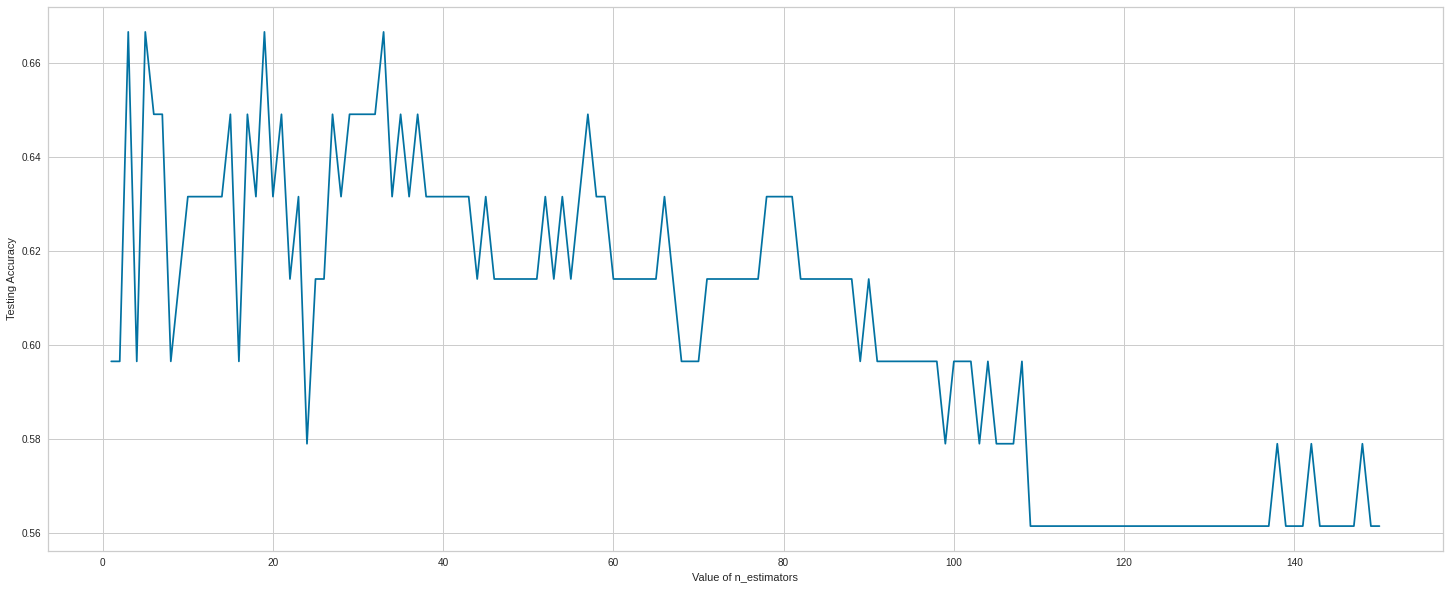

In [412]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.49122807017543857
2/150 round completed......................... Accurecy: 0.5964912280701754
3/150 round completed......................... Accurecy: 0.5964912280701754
4/150 round completed......................... Accurecy: 0.5964912280701754
5/150 round completed......................... Accurecy: 0.5789473684210527
6/150 round completed......................... Accurecy: 0.5964912280701754
7/150 round completed......................... Accurecy: 0.5964912280701754
8/150 round completed......................... Accurecy: 0.5614035087719298
9/150 round completed......................... Accurecy: 0.5964912280701754
10/150 round completed......................... Accurecy: 0.5964912280701754
11/150 round completed......................... Accurecy: 0.5964912280701754
12/150 round completed......................... Accurecy: 0.5964912280701754
13/150 round completed......................... Accurecy: 0.5964912280701754
14/150 

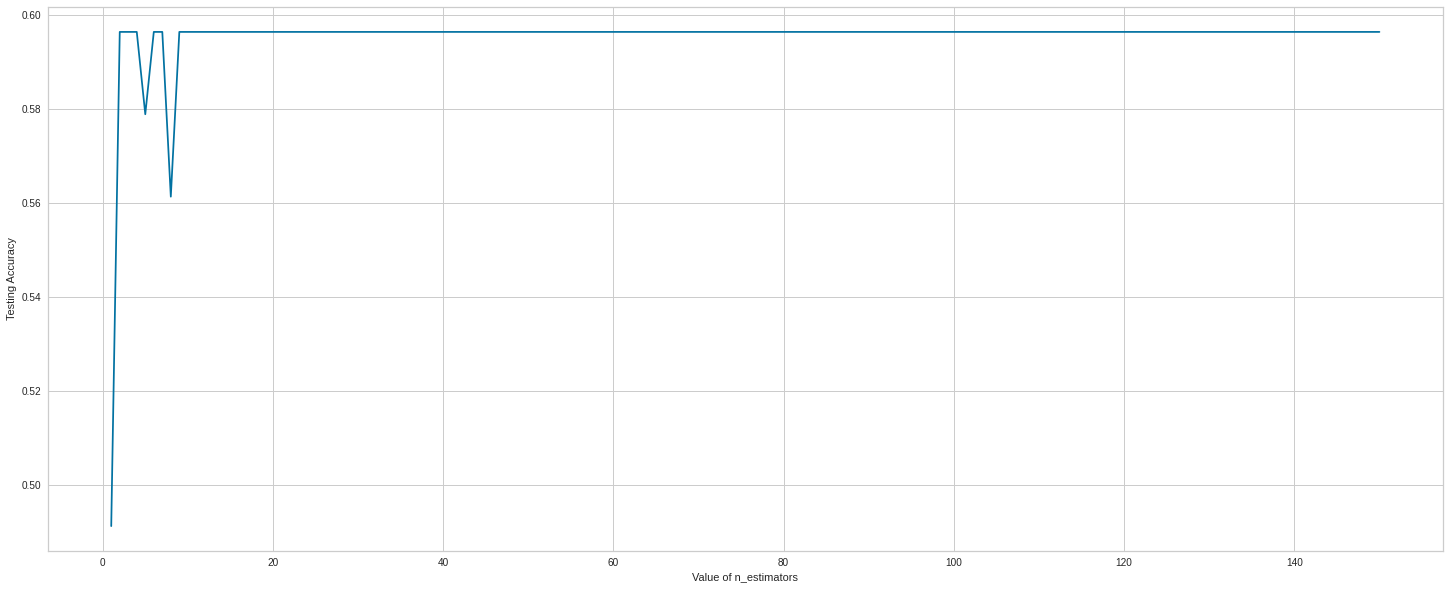

In [413]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [414]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [15 23]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        19
           1       0.85      0.61      0.71        38

    accuracy                           0.67        57
   macro avg       0.68      0.70      0.66        57
weighted avg       0.73      0.67      0.68        57

Accurecy:  0.6666666666666666


In [415]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [19 19]]
              precision    recall  f1-score   support

           0       0.44      0.79      0.57        19
           1       0.83      0.50      0.62        38

    accuracy                           0.60        57
   macro avg       0.63      0.64      0.59        57
weighted avg       0.70      0.60      0.60        57

Accurecy:  0.5964912280701754


In [416]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[17  2]
 [24 14]]
              precision    recall  f1-score   support

           0       0.41      0.89      0.57        19
           1       0.88      0.37      0.52        38

    accuracy                           0.54        57
   macro avg       0.64      0.63      0.54        57
weighted avg       0.72      0.54      0.53        57

Accurecy:  0.543859649122807




---



---



#XGB

In [417]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[15  4]
 [15 23]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        19
           1       0.85      0.61      0.71        38

    accuracy                           0.67        57
   macro avg       0.68      0.70      0.66        57
weighted avg       0.73      0.67      0.68        57

Accurecy:  0.6666666666666666


1/250 round completed......................... Accurecy: 0.631578947368421
2/250 round completed......................... Accurecy: 0.6666666666666666
3/250 round completed......................... Accurecy: 0.6666666666666666
4/250 round completed......................... Accurecy: 0.6666666666666666
5/250 round completed......................... Accurecy: 0.6666666666666666
6/250 round completed......................... Accurecy: 0.6666666666666666
7/250 round completed......................... Accurecy: 0.6491228070175439
8/250 round completed......................... Accurecy: 0.6491228070175439
9/250 round completed......................... Accurecy: 0.631578947368421
10/250 round completed......................... Accurecy: 0.631578947368421
11/250 round completed......................... Accurecy: 0.6140350877192983
12/250 round completed......................... Accurecy: 0.6140350877192983
13/250 round completed......................... Accurecy: 0.6140350877192983
14/250 roun

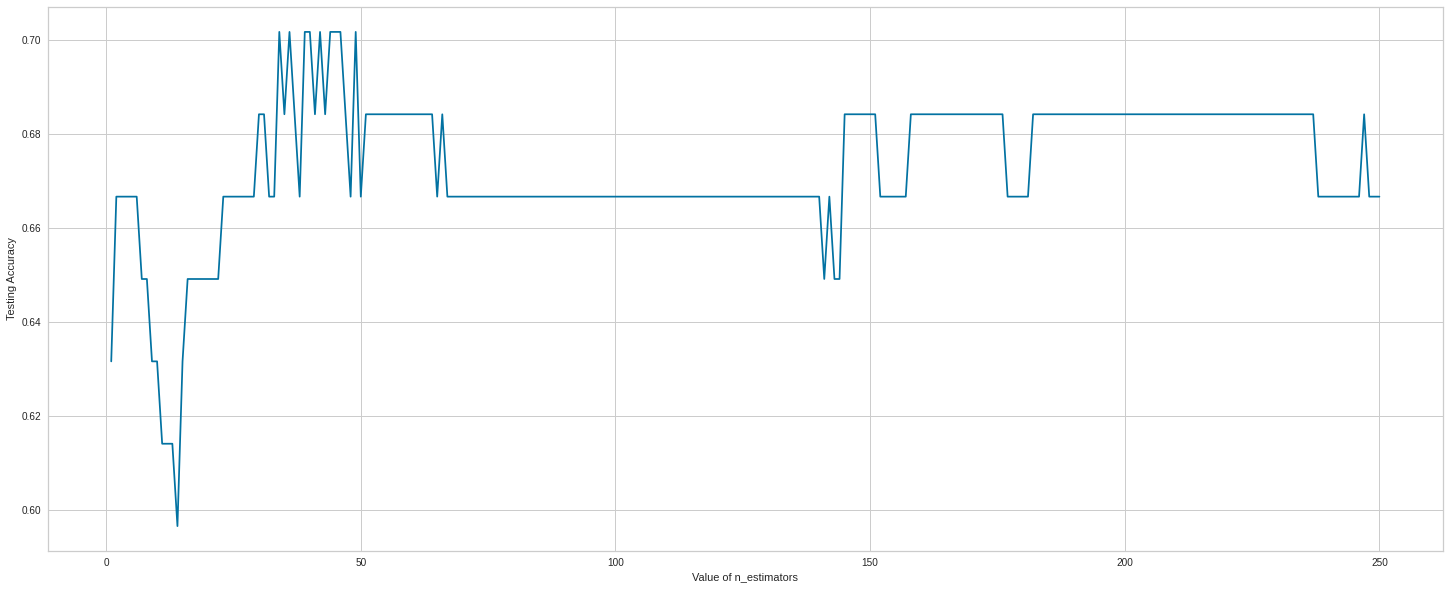

In [418]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7192982456140351
2/250 round completed......................... Accurecy: 0.6491228070175439
3/250 round completed......................... Accurecy: 0.6666666666666666
4/250 round completed......................... Accurecy: 0.6491228070175439
5/250 round completed......................... Accurecy: 0.6491228070175439
6/250 round completed......................... Accurecy: 0.631578947368421
7/250 round completed......................... Accurecy: 0.631578947368421
8/250 round completed......................... Accurecy: 0.631578947368421
9/250 round completed......................... Accurecy: 0.631578947368421
10/250 round completed......................... Accurecy: 0.631578947368421
11/250 round completed......................... Accurecy: 0.631578947368421
12/250 round completed......................... Accurecy: 0.631578947368421
13/250 round completed......................... Accurecy: 0.631578947368421
14/250 round com

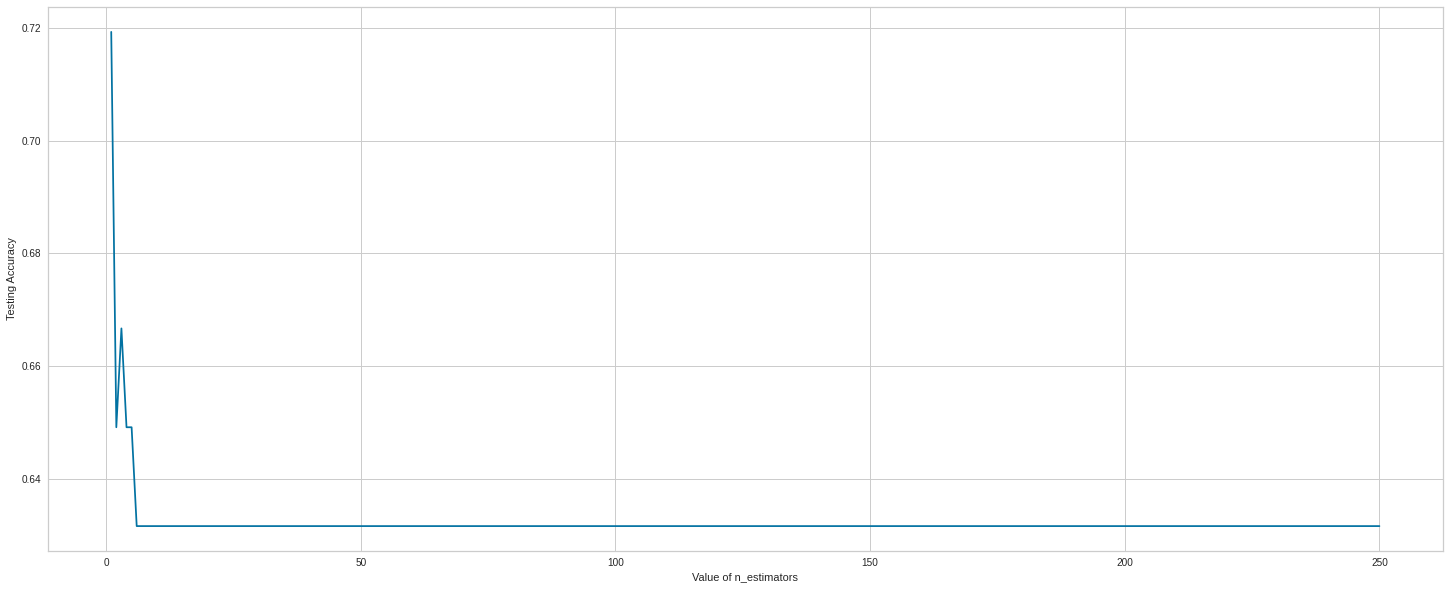

In [419]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [420]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[16  3]
 [13 25]]
              precision    recall  f1-score   support

           0       0.55      0.84      0.67        19
           1       0.89      0.66      0.76        38

    accuracy                           0.72        57
   macro avg       0.72      0.75      0.71        57
weighted avg       0.78      0.72      0.73        57

Accurecy:  0.7192982456140351
XGBClassifier(max_depth=1)


In [421]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[15  4]
 [13 25]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        19
           1       0.86      0.66      0.75        38

    accuracy                           0.70        57
   macro avg       0.70      0.72      0.69        57
weighted avg       0.75      0.70      0.71        57

Accurecy:  0.7017543859649122
XGBClassifier(n_estimators=34)


In [422]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[15  4]
 [20 18]]
              precision    recall  f1-score   support

           0       0.43      0.79      0.56        19
           1       0.82      0.47      0.60        38

    accuracy                           0.58        57
   macro avg       0.62      0.63      0.58        57
weighted avg       0.69      0.58      0.59        57

Accurecy:  0.5789473684210527


#KNN

In [423]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[14  5]
 [31  7]]
              precision    recall  f1-score   support

           0       0.31      0.74      0.44        19
           1       0.58      0.18      0.28        38

    accuracy                           0.37        57
   macro avg       0.45      0.46      0.36        57
weighted avg       0.49      0.37      0.33        57

Accurecy:  0.3684210526315789


1/105 round completed......................... Accurecy: 0.47368421052631576
2/105 round completed......................... Accurecy: 0.40350877192982454
3/105 round completed......................... Accurecy: 0.42105263157894735
4/105 round completed......................... Accurecy: 0.3333333333333333
5/105 round completed......................... Accurecy: 0.3684210526315789
6/105 round completed......................... Accurecy: 0.3508771929824561
7/105 round completed......................... Accurecy: 0.3684210526315789
8/105 round completed......................... Accurecy: 0.3333333333333333
9/105 round completed......................... Accurecy: 0.40350877192982454
10/105 round completed......................... Accurecy: 0.3157894736842105
11/105 round completed......................... Accurecy: 0.3508771929824561
12/105 round completed......................... Accurecy: 0.3508771929824561
13/105 round completed......................... Accurecy: 0.3684210526315789
14/1

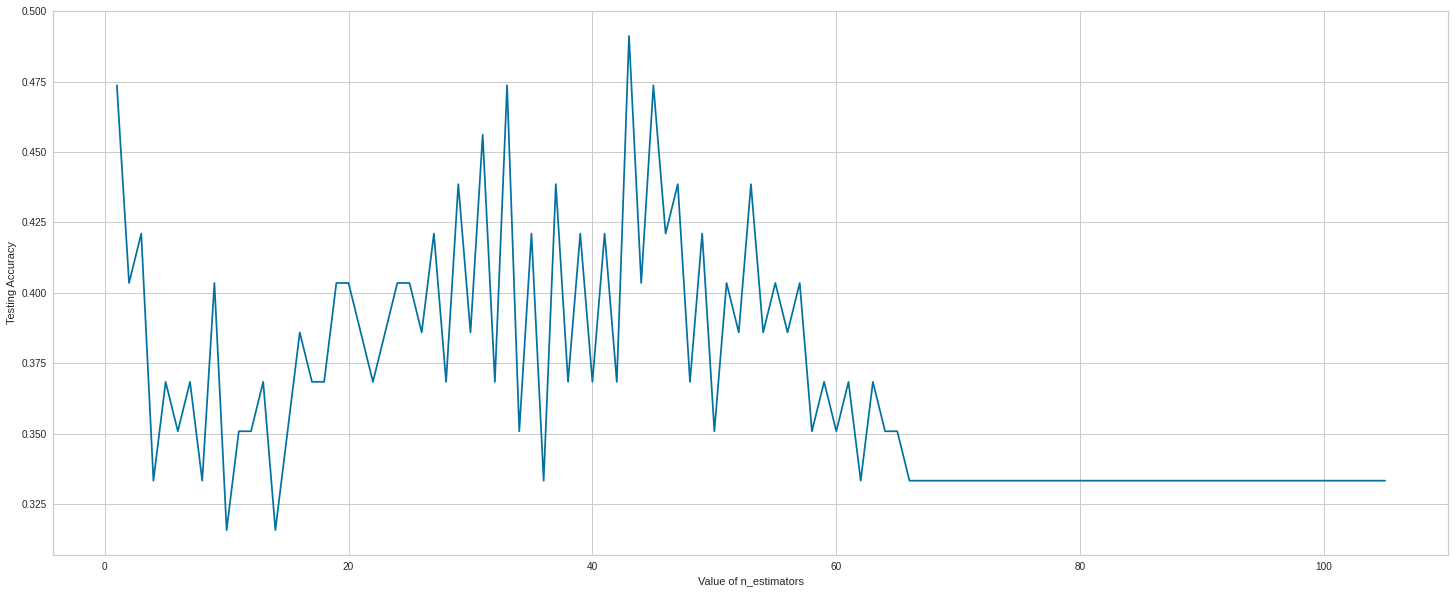

In [424]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [425]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [25 13]]
              precision    recall  f1-score   support

           0       0.38      0.79      0.51        19
           1       0.76      0.34      0.47        38

    accuracy                           0.49        57
   macro avg       0.57      0.57      0.49        57
weighted avg       0.63      0.49      0.48        57

Accurecy:  0.49122807017543857


#NB

In [426]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[12  7]
 [12 26]]
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        19
           1       0.79      0.68      0.73        38

    accuracy                           0.67        57
   macro avg       0.64      0.66      0.65        57
weighted avg       0.69      0.67      0.67        57

Accurecy:  0.6666666666666666




---



---



#Result

In [427]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.5789473684210527
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=8, random_state=0) 1  :  0.6842105263157895
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.6491228070175439
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=69, random_state=0) 2  :  0.7017543859649122
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, random_state=0) 2  :  0.7368421052631579
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, n_estimators=69, random_state=0) 2  :  0.6666666666666666
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.5964912280701754
---------------------------------------------------------------

RandomForestC

In [428]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(GradientBoostingClassifier(max_depth=1, random_state=0), 2, 'GradientBoostingClassifier')   :  0.7368421052631579
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=1), 4, 'xgboost')   :  0.7192982456140351
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(n_estimators=69, random_state=0), 2, 'GradientBoostingClassifier')   :  0.7017543859649122
-------------------------------------------------------------------------------------------------
(XGBClassifier(n_estimators=34), 4, 'xgboost')   :  0.7017543859649122
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(n_estimators=8, random_state=0), 1, 'AdaBoostClassifier')   :  0.6842105263157895
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_dept

In [429]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(GradientBoostingClassifier(max_depth=1, random_state=0), 'GradientBoostingClassifier')
(XGBClassifier(max_depth=1), 'xgboost')
(AdaBoostClassifier(n_estimators=8, random_state=0), 'AdaBoostClassifier')
(RandomForestClassifier(n_estimators=3, random_state=0), 'RandomForestClassifier')


In [430]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [431]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
GradientBoostingClassifier(max_depth=1, random_state=0)
[[64  3]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.92      0.85      0.89        41

    accuracy                           0.92       108
   macro avg       0.92      0.90      0.91       108
weighted avg       0.92      0.92      0.92       108

Accurecy:  0.9166666666666666
--------------------------------------------------
XGBClassifier(max_depth=1)
[[63  4]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        67
           1       0.89      0.83      0.86        41

    accuracy                           0.90       108
   macro avg       0.90      0.88      0.89       108
weighted avg       0.90      0.90      0.90       108

Accurecy:  0.8981481481481481
--------------------------------------------------
AdaBoostClas

#SHAP

In [432]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#SHAP MODEL 1

In [433]:
print("Models: ",best_models[0][1])

explainer = shap.Explainer(best_models[0][0].predict, X_test)

shap_values1 = explainer(X_test)
features_names=list_of_feat

if 'Subjects' in features_names:
  features_names.pop(0)

Models:  GradientBoostingClassifier


Models:  GradientBoostingClassifier(max_depth=1, random_state=0)


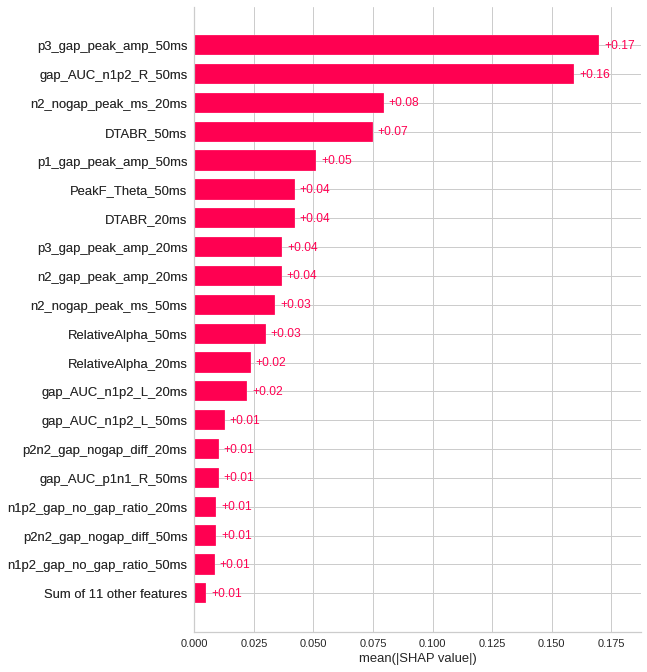

In [434]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1,max_display=20)

Models:  GradientBoostingClassifier(max_depth=1, random_state=0)


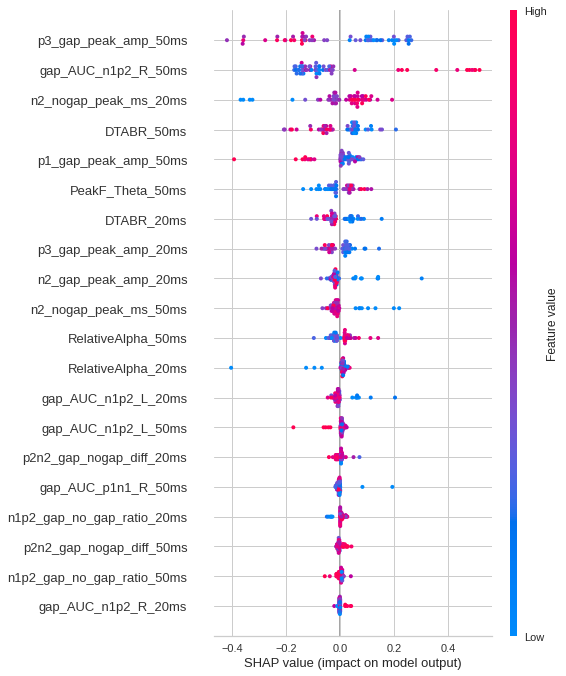

In [435]:
print("Models: ",best_models[0][0])
shap.summary_plot(shap_values1,max_display=20,feature_names=features_names)

**Local Explanation** <br>
You can change the index of <i>shap_values1[index]</i> to accure the desired output. 

Models:  GradientBoostingClassifier(max_depth=1, random_state=0)


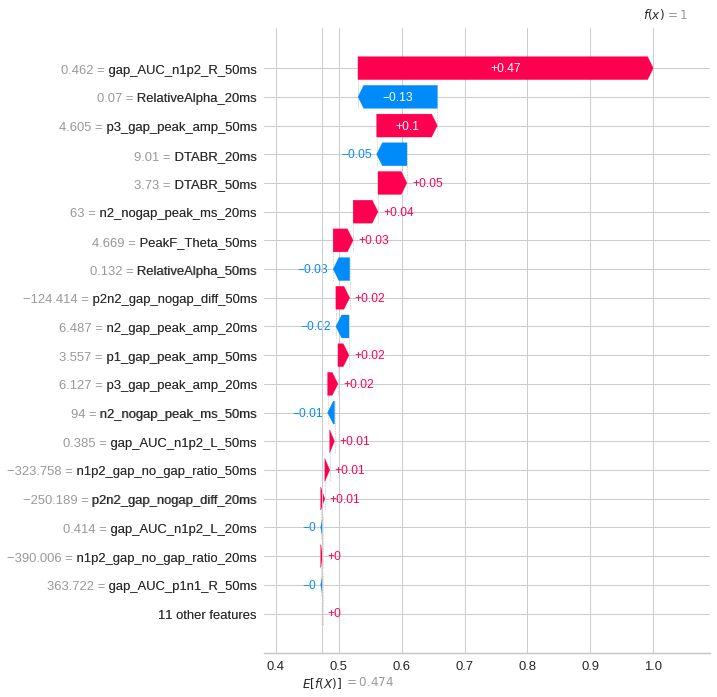

In [436]:
print("Models: ",best_models[0][0])
shap.plots.waterfall(shap_values1[2],max_display=20)

Models:  GradientBoostingClassifier(max_depth=1, random_state=0)


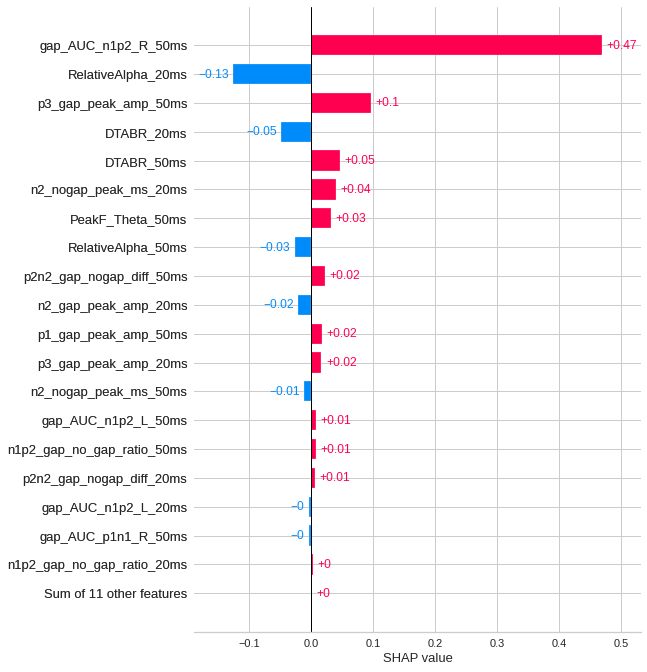

In [437]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1[2],max_display=20)

#SHAP MODEL2

In [438]:
print("Models: ",best_models[1][0])

explainer = shap.Explainer(best_models[1][0].predict, X_test)

shap_values2 = explainer(X_test)
features_names=list_of_feat

Models:  XGBClassifier(max_depth=1)


**Global Explanation**

Models:  XGBClassifier(max_depth=1)


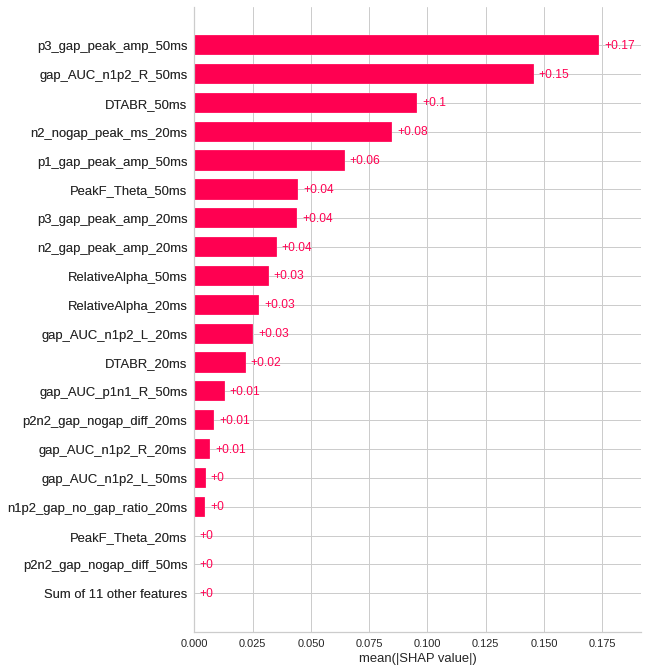

In [439]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2,max_display=20)

Models:  XGBClassifier(max_depth=1)


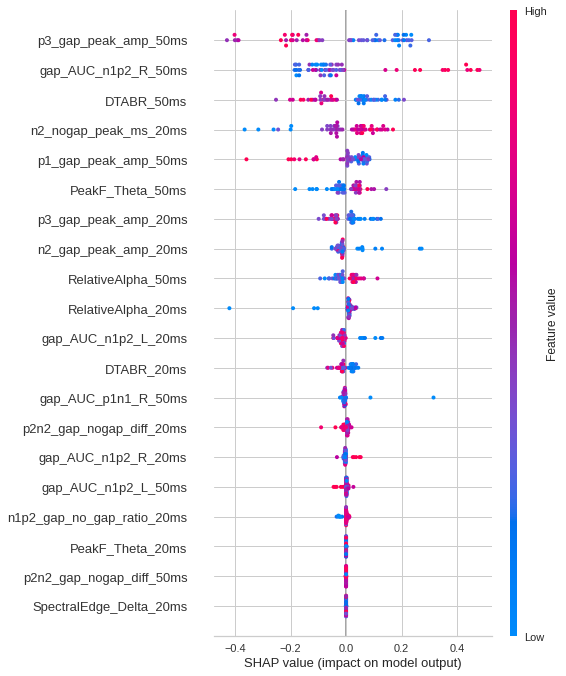

In [440]:
print("Models: ",best_models[1][0])
shap.summary_plot(shap_values2,max_display=20,feature_names=features_names)

**Local Explanation**

Models:  XGBClassifier(max_depth=1)


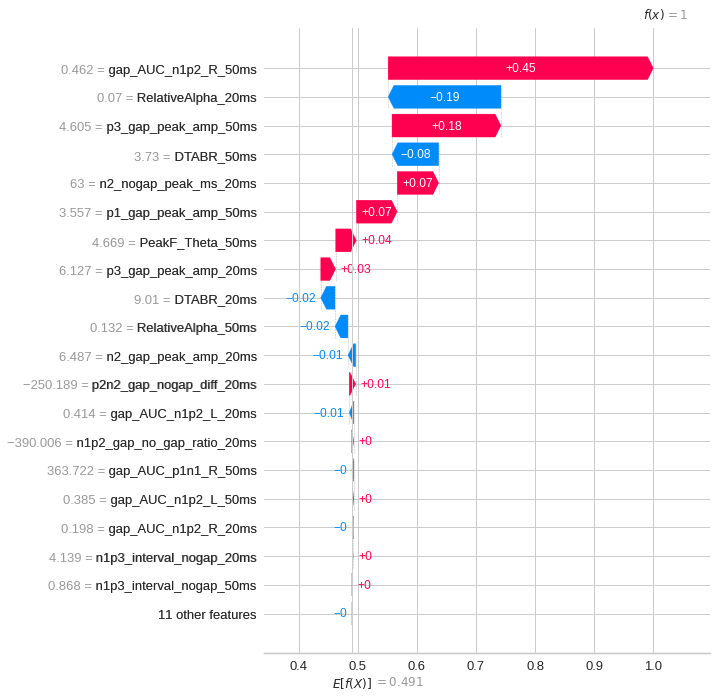

In [441]:
print("Models: ",best_models[1][0])
shap.plots.waterfall(shap_values2[2],max_display=20)

Models:  XGBClassifier(max_depth=1)


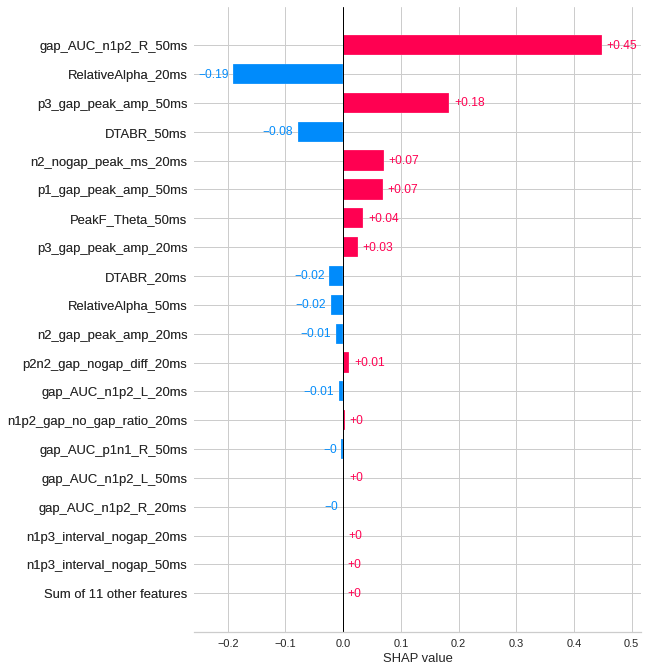

In [442]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2[2],max_display=20)

#SHAP MODEL 3

In [443]:
print("Models: ",best_models[2][0])

explainer = shap.Explainer(best_models[2][0].predict, X_test)

shap_values3 = explainer( X_test)
features_names=list_of_feat

Models:  AdaBoostClassifier(n_estimators=8, random_state=0)


**Global**

Models:  AdaBoostClassifier(n_estimators=8, random_state=0)


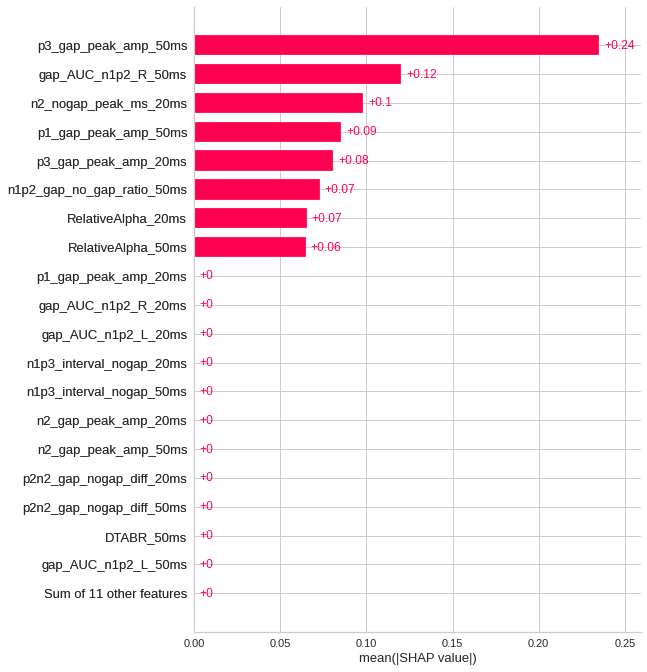

In [444]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3,max_display=20)

Models:  AdaBoostClassifier(n_estimators=8, random_state=0)


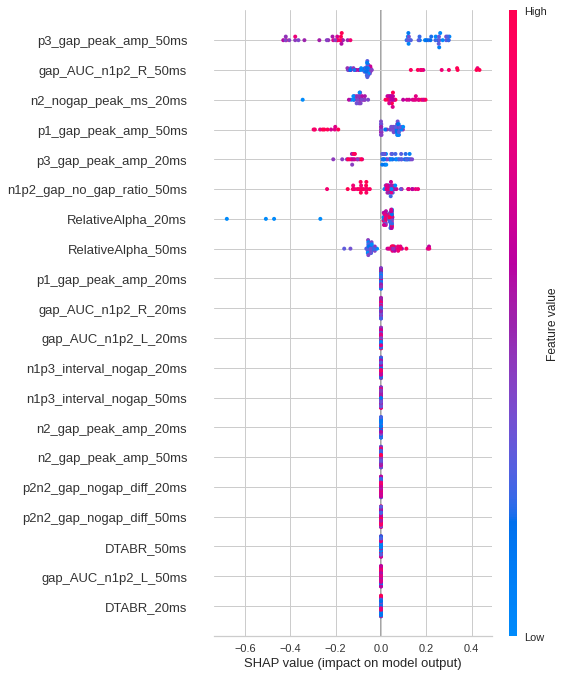

In [445]:
print("Models: ",best_models[2][0])
shap.summary_plot(shap_values3,max_display=20,feature_names=features_names)

**LOCAL**

Models:  AdaBoostClassifier(n_estimators=8, random_state=0)


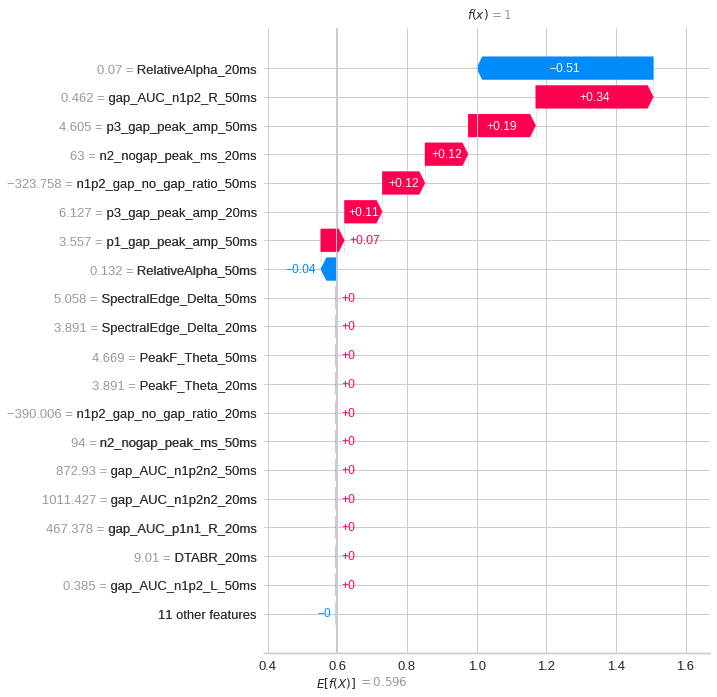

In [446]:
print("Models: ",best_models[2][0])
shap.plots.waterfall(shap_values3[2],max_display=20)

Models:  AdaBoostClassifier(n_estimators=8, random_state=0)


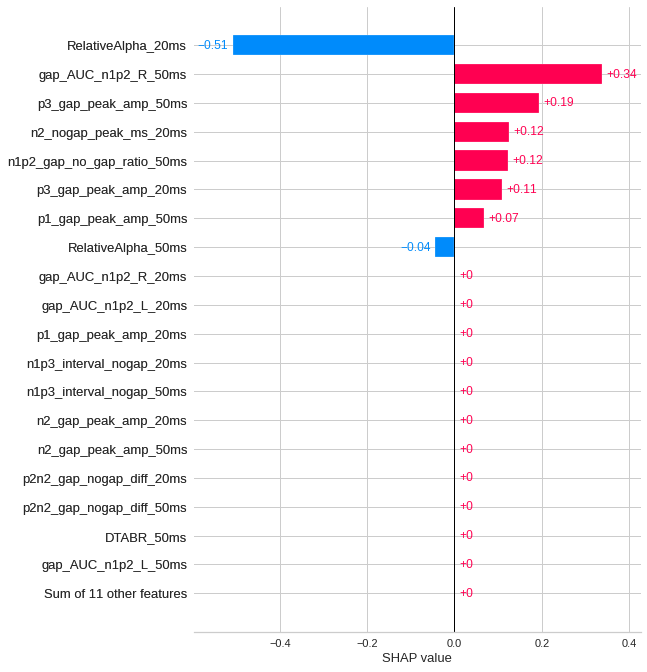

In [447]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3[2],max_display=20)

#Confusion Matrix For Testing

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


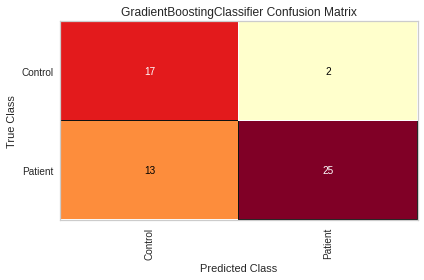

In [448]:

from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(best_models[0][0], classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

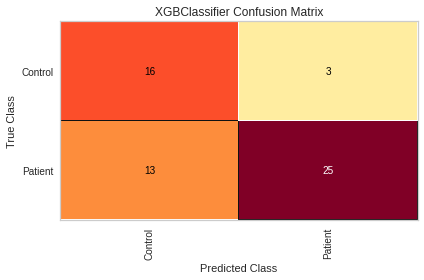

In [449]:
cm2 = ConfusionMatrix(best_models[1][0], classes=classes)

cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2.show()

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


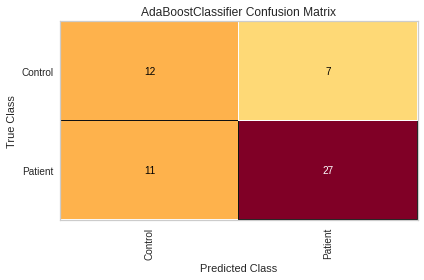

In [450]:


cm3 = ConfusionMatrix(best_models[2][0], classes=classes)

cm3.fit(X_train, y_train)
cm3.score(X_test, y_test)
cm3.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


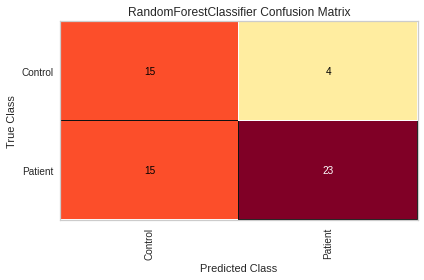

In [451]:
cm4 = ConfusionMatrix(best_models[3][0], classes=classes)

cm4.fit(X_train, y_train)
cm4.score(X_test, y_test)
cm4.show()

#Confusion Matrix For Training

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


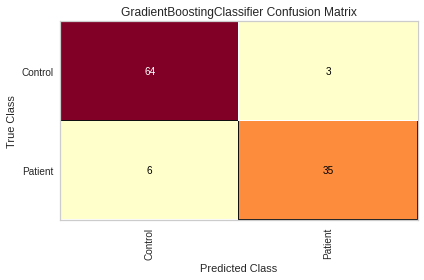

In [452]:
cm1 = ConfusionMatrix(best_models[0][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

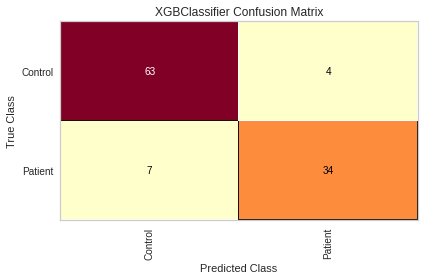

In [453]:
cm1 = ConfusionMatrix(best_models[1][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


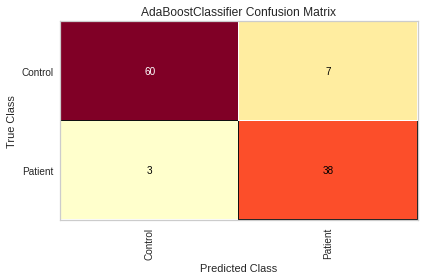

In [454]:
cm1 = ConfusionMatrix(best_models[2][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


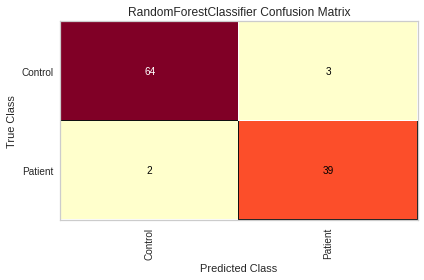

In [455]:
cm1 = ConfusionMatrix(best_models[3][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [456]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [457]:
for i in range(len(best_models)):
  temp=X_test_with_subject

  prediction_cls = reverse_transfrom(list(best_models[i][0].predict(X_test[0:])))
  actual_cls = reverse_transfrom(list(y_test[0:]))

  temp["Actual"] = actual_cls
  temp["Predicted"] = prediction_cls

  temp.to_csv(best_models[i][1]+".csv")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

#ROC Comparaing Machine Learning Models

In [471]:

mod=[]
for i in best_models:
  mod.append(i[0])

In [477]:


def ROC(mod,X_t,y_t):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))




  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])




  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))



  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))



  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])




  # Title
  plt.title('ROC Plot Testing',fontsize= 18, fontweight='bold')
  plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
  plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
  plt.legend() 
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  fig.savefig('ROC_Testing.png', dpi=100)
  plt.show()

X has feature names, but GradientBoostingClassifier was fitted without feature names


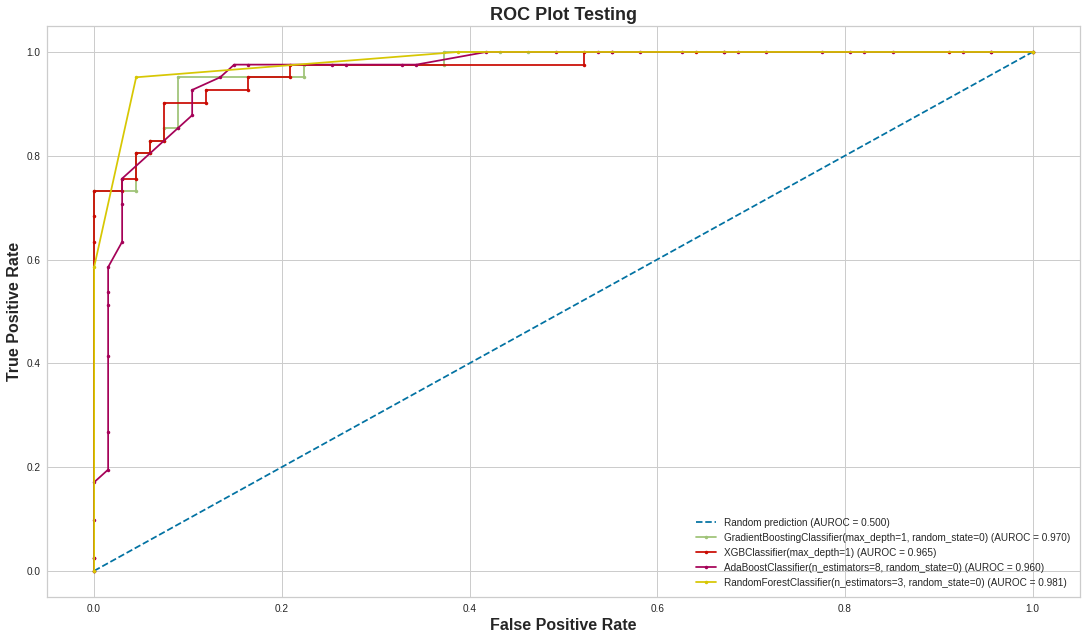

In [476]:
ROC(mod,X_train,y_train)

#Cross_val_score function

In [460]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5789473684210527
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6848484848484848 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=8, random_state=0)  -> Accuracy:  0.6842105263157895
AdaBoostClassifier(n_estimators=8, random_state=0)  -> AVG Accurecy After CV: 0.6666666666666667 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.6491228070175439
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.703030303030303 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=69, random_state=0)  -> Accuracy:  0.7017543859649122
GradientBoostingClassifier(n_estimators=69, random_state=0)  -> AVG Accurecy After CV: 0.696969696969697 (For 5 Fold)
---------------------------

In [461]:


def CV_ROC(model,folds):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold



  cv = StratifiedKFold(n_splits=folds)




  fig1 = plt.figure(figsize=[12,12])
  ax1 = fig1.add_subplot(111,aspect = 'equal')

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-> '+str(model))
  plt.legend(loc="lower right")
  plt.show()

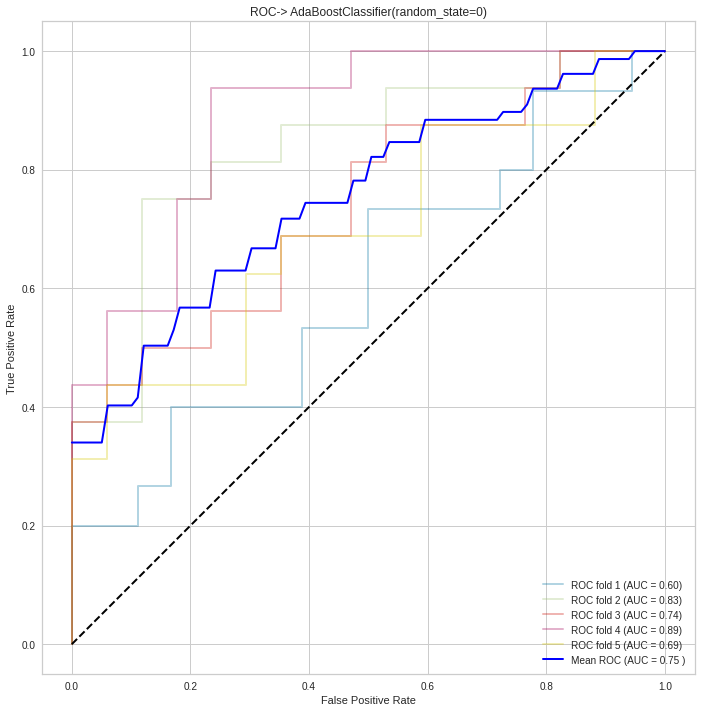

In [462]:
CV_ROC(models[0],5)

In [463]:
import ipywidgets as widgets
from IPython.display import display



new_keys=[]
for i in models:
  i=widgets.Checkbox(
    value=False,
    description=str(i),
    disabled=False,
    indent=False
    )
  display(i)
  new_keys.append(i)



Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=69, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=69, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=2, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=34)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=34)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=43)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

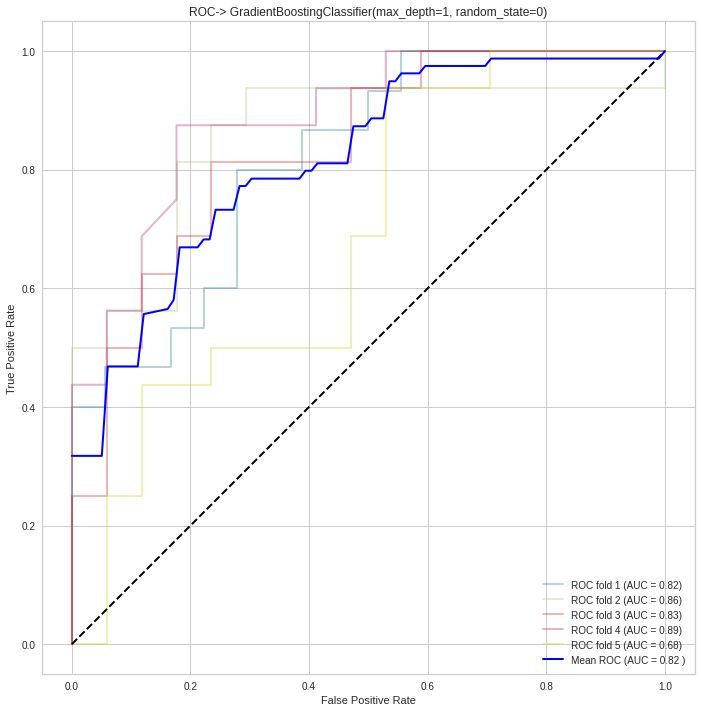

-----------------------------------------------------------------
-----------------------------------------------------------------


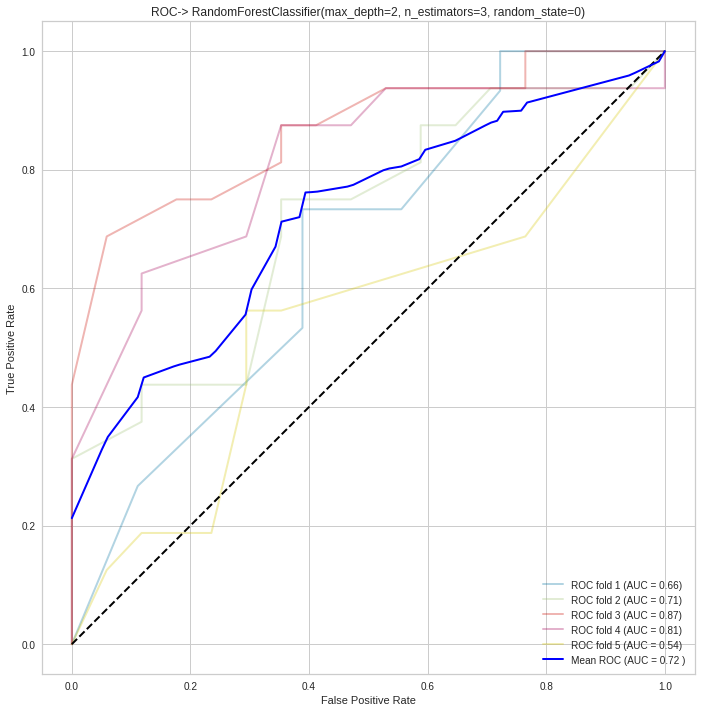

-----------------------------------------------------------------
-----------------------------------------------------------------


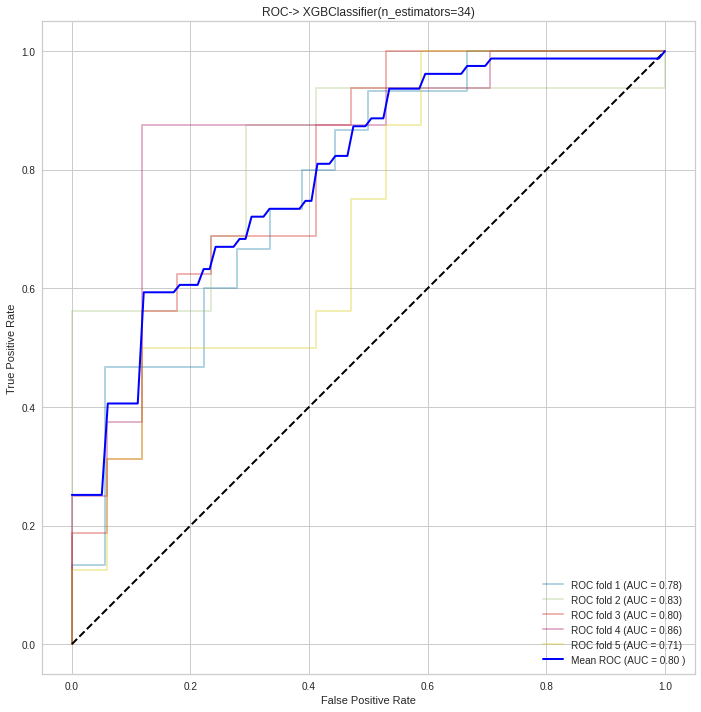

-----------------------------------------------------------------
-----------------------------------------------------------------


In [468]:
# run this cell after selecting
k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification

In [465]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(30,), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 3.8421 - accuracy: 0.0648
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 2.6884 - accuracy: 0.6389
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.9618 - accuracy: 0.6481
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 1.5169 - accuracy: 0.6574
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0934 - accuracy: 0.6296
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.9239 - accuracy: 0.6574
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8139 - accuracy: 0.6574
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7573 - accuracy: 0.6389
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.6389
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7103 - accuracy: 0.6481
Epoch 11/200
4/4 [===========

In [466]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.8175 - accuracy: 0.3333


[0.8175004720687866, 0.3333333432674408]

In [467]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

[[19  0]
 [38  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        19
           1       0.00      0.00      0.00        38

    accuracy                           0.33        57
   macro avg       0.17      0.50      0.25        57
weighted avg       0.11      0.33      0.17        57

Accurecy:  0.3333333333333333


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
